In [1]:
# https://www.youtube.com/watch?v=nRLI_KbvZTQ

In [2]:
import numpy as np
from scipy import stats

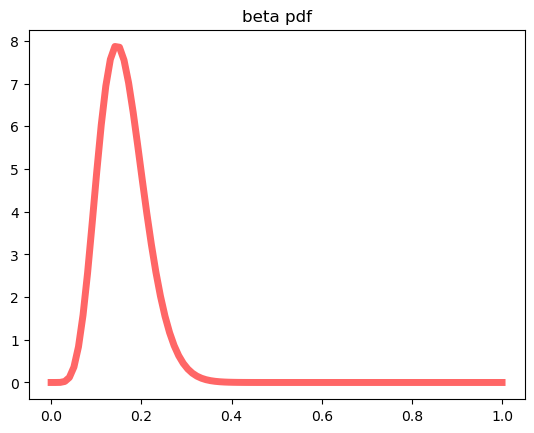

In [3]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

a, b = 8, 42
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6)
plt.title('beta pdf')
plt.show()


In [4]:
group_size = 1000

A_group, B_group = np.random.rand(2, group_size)

A_successes = sum(A_group < 0.15)
B_successes = sum(B_group < 0.20)

A_failures = group_size - A_successes
B_failures = group_size - B_successes

A_posterior = beta(a + A_successes, b + A_failures )
B_posterior = beta(a + B_successes, b + B_failures)

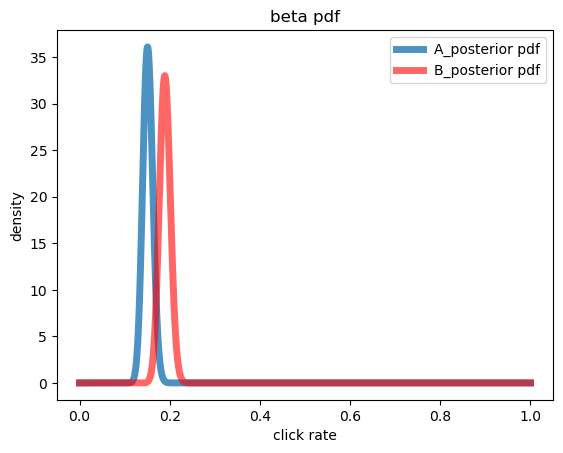

In [5]:
x = np.linspace(0, 1, 1000)
A_posterior_eval = A_posterior.pdf(x)
B_posterior_eval = B_posterior.pdf(x)
plt.plot(x, A_posterior_eval, '-', lw=5, alpha=0.8, label='A_posterior pdf')
plt.plot(x, B_posterior_eval, 'r-', lw=5, alpha=0.6, label='B_posterior pdf')
plt.title('beta pdf')
plt.legend()
plt.ylabel('density') 
plt.xlabel('click rate')
plt.show()


In [6]:
A_click_rate = x[list(A_posterior_eval).index(A_posterior_eval.max())]
B_click_rate = x[list(B_posterior_eval).index(B_posterior_eval.max())]

print(f'A_click_rate: {A_click_rate:.3f}, B_click_rate: {B_click_rate:.3f}')

A_click_rate: 0.151, B_click_rate: 0.189


In [7]:
import pandas as pd
total_tests = 100000

A_samples = pd.Series(A_posterior.rvs() for _ in range(total_tests))
B_samples = pd.Series(B_posterior.rvs() for _ in range(total_tests))

B_wins = sum(B_samples > A_samples)

print('B_wins/total_tests:',B_wins/total_tests, 'p equivalent to:', 1 - B_wins/total_tests)


B_wins/total_tests: 0.99003 p equivalent to: 0.009970000000000034


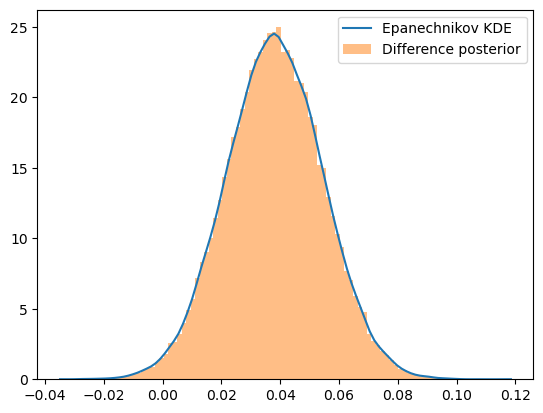

In [13]:
difference = B_samples - A_samples
nbins = 100
#difference.hist(bins=nbins, grid=False, density=True)
#plt.xlabel('B_samples - A_samples')
#plt.ylabel('density') 
#plt.show()

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Compute KDE
kde = sm.nonparametric.KDEUnivariate(difference)
kde.fit() #kde.fit(kernel='epa', bw='scott')  # 'epa' for Epanechnikov, you can try 'biw', 'tri', 'cos', etc.

# Evaluate density
x_kde = np.linspace(min(difference), max(difference), nbins)
plt.plot(x_kde, kde.evaluate(x_kde), label="Epanechnikov KDE")
plt.hist(difference, bins=nbins, density=True, alpha=0.5, label="Difference posterior")
plt.legend()
plt.show()

B_wins/total_tests: 0.4993 p equivalent to: 0.5006999999999999


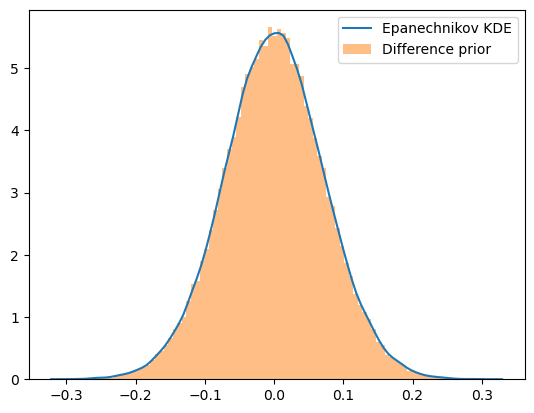

In [9]:
beta_prior = beta(a, b)
A_samples_prior = pd.Series(beta_prior.rvs() for _ in range(total_tests))
B_samples_prior = pd.Series(beta_prior.rvs() for _ in range(total_tests))


B_wins = sum(B_samples_prior > A_samples_prior)

print('B_wins/total_tests:',B_wins/total_tests, 'p equivalent to:', 1 - B_wins/total_tests)


difference_prior = B_samples_prior - A_samples_prior
nbins = 100
#difference_prior.hist(bins=nbins, grid=False, density=True)
#plt.xlabel('B_samples_prior - A_samples_prior')
#plt.ylabel('density') 
#plt.show()

# Compute KDE
kde_prior = sm.nonparametric.KDEUnivariate(difference_prior)
kde_prior.fit() #kde.fit(kernel='epa', bw='scott')  # 'epa' for Epanechnikov, you can try 'biw', 'tri', 'cos', etc.

# Evaluate density
x_kde = np.linspace(min(difference_prior), max(difference_prior), nbins)
plt.plot(x_kde, kde_prior.evaluate(x_kde), label="Epanechnikov KDE")
plt.hist(difference_prior, bins=nbins, density=True, alpha=0.5, label="Difference prior")
plt.legend()
plt.show()


In [10]:
posterior_kde = kde.evaluate(0)
prior_kde = kde_prior.evaluate(0)
print(f'Posterior at 0: {posterior_kde[0]:.3f}, Prior at 0: {prior_kde[0]:.3f}, Bayes factor: {posterior_kde[0]/prior_kde[0]:.3f}')

Posterior at 0: 1.632, Prior at 0: 5.562, Bayes factor: 0.293


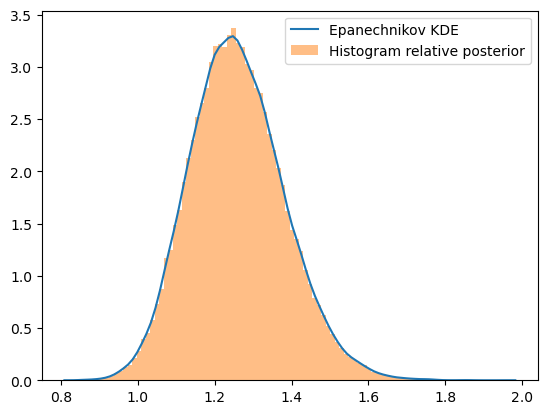

In [14]:
relative_posterior = B_samples/A_samples
nbins = 100
#relative_posterior.hist(bins=nbins, grid=False)
#plt.xlabel('B_samples/A_samples')
#plt.ylabel('# of occurrences') 
#plt.show()


# Compute KDE
kde_relative_posterior = sm.nonparametric.KDEUnivariate(relative_posterior)
kde_relative_posterior.fit() #kde.fit(kernel='epa', bw='scott')  # 'epa' for Epanechnikov, you can try 'biw', 'tri', 'cos', etc.

# Evaluate density
x_kde = np.linspace(min(relative_posterior), max(relative_posterior), nbins)
plt.plot(x_kde, kde_relative_posterior.evaluate(x_kde), label="Epanechnikov KDE")
plt.hist(relative_posterior, bins=nbins, density=True, alpha=0.5, label="Histogram relative posterior")
plt.legend()
plt.show()

In [21]:
evaluated_kde_relative_posterior = kde_relative_posterior.evaluate(x_kde)
max_kde = max(evaluated_kde_relative_posterior)
print(f'Maximum relative posterior: {max_kde:.3f}')
x_kde[np.where(evaluated_kde_relative_posterior == max_kde)]

Maximum relative posterior: 3.295


array([1.24722919])

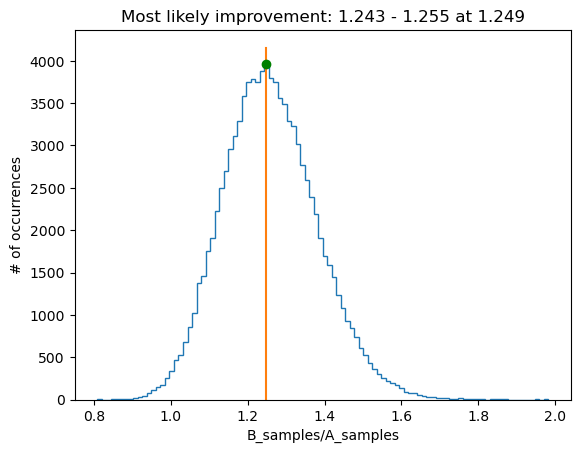

In [23]:
counts, bins = np.histogram(relative_posterior, bins=nbins)
plt.stairs(counts, bins)
improvement = (bins[list(counts).index(counts.max())], bins[list(counts).index(counts.max())+1])
plt.plot([np.mean(improvement), np.mean(improvement)], [0, counts.max()*1.05])
plt.plot(np.mean(improvement), counts.max(), marker = 'o', color='green')
plt.xlabel('B_samples/A_samples')
plt.ylabel('# of occurrences') 
plt.title(f'Most likely improvement: {improvement[0]:.3f} - {improvement[1]:.3f} at {np.mean(improvement):.3f}')
plt.show()